In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from collections import Counter
mlp.rcParams['axes.unicode_minus'] = False
mlp.rcParams['font.family'] = "AppleGothic"

In [2]:
data = pd.read_csv('./실습데이터.csv')
df = data
#df = pd.read_csv('../data/eda-proj-fc-purchase.csv')

In [3]:
## 거래일자 중 시간을 버리고 datetime으로 변환
# '오전' 이후 부분을 제거합니다.
df['거래일자'] = df['거래일자'].str.split('오전').str[0]
df['거래일자'] = df['거래일자'].str.split('오후').str[0]

# '거래일자' 컬럼을 날짜형으로 변환합니다.
df['거래일자'] = pd.to_datetime(df['거래일자'])

## 판매가격을 int로 변환
df['판매가격'] = pd.to_numeric(df['판매가격'], errors='coerce').astype('Int64')
df['쿠폰할인액'] = pd.to_numeric(df['쿠폰할인액'], errors='coerce').astype('Int64')
df['거래금액'] = pd.to_numeric(df['거래금액'], errors='coerce').astype('Int64')
df['환불금액'] = pd.to_numeric(df['환불금액'], errors='coerce').astype('Int64')
df['거래id'] = pd.to_numeric(df['거래id'], errors='coerce').astype('str')
df['고객id'] = pd.to_numeric(df['고객id'], errors='coerce').astype('str')
df['코스ID'] = pd.to_numeric(df['코스ID'], errors='coerce').astype('str')

In [4]:
df

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31,-,189000,TRANSFER,159000,<NA>,159000,<NA>
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30,-,501000,TRANSFER,501000,<NA>,501000,<NA>
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31,-,549000,CARD,549000,<NA>,549000,<NA>
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,<NA>
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31,-,239000,CARD,239000,<NA>,239000,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,<NA>
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01,-,385000,CARD,385000,<NA>,385000,<NA>
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,<NA>
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02,-,289000,VBANK,289000,<NA>,289000,<NA>


In [5]:
# '고객id' 별로 그룹을 묶고, 각 그룹의 크기를 계산
group_sizes = df.groupby('고객id').size()

# 'Customer_Type' 컬럼을 설정
df_new = df.copy()
for idx, row in df_new.iterrows():
    if group_sizes[row['고객id']] >= 2:
        df_new.loc[idx, 'cus_type'] = 'cus_rep'
    else:
        df_new.loc[idx, 'cus_type'] = 'cus_comm'

In [6]:
#cus_type column이 추가된 new dataframe생성
df_new

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,cus_type
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31,-,189000,TRANSFER,159000,<NA>,159000,<NA>,cus_comm
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30,-,501000,TRANSFER,501000,<NA>,501000,<NA>,cus_comm
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31,-,549000,CARD,549000,<NA>,549000,<NA>,cus_rep
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,<NA>,cus_rep
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31,-,239000,CARD,239000,<NA>,239000,<NA>,cus_comm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,<NA>,cus_comm
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01,-,385000,CARD,385000,<NA>,385000,<NA>,cus_rep
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,<NA>,cus_rep
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02,-,289000,VBANK,289000,<NA>,289000,<NA>,cus_rep


In [7]:
# cus_type이 cus_rep인 value를 선택하고 cus_type제거, index를 초기화한 dataframe 생성
df_rep = df_new[df_new['cus_type'] == 'cus_rep']
df_rep = df_rep.drop('cus_type', axis=1)
df_rep = df_rep.reset_index(drop=False, inplace=False)
df_rep

,index,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31,-,549000,CARD,549000,<NA>,549000,<NA>
1,3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,<NA>
2,5,2413886,PAYMENT,47039,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31,-,239000,POINT,239000,<NA>,239000,<NA>
3,7,2413876,PAYMENT,86273,214558,FASTCAMPUS,올인원,프로그래밍,[Kit] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지,2022-12-31,[20% 할인] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지 기수...,195000,CARD,156000,39000,156000,<NA>
4,8,2413872,PAYMENT,81432,214298,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터,2022-12-31,-,130000,CARD,130000,<NA>,130000,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126970,159322,1551425,PAYMENT,20990,204366,FASTCAMPUS,올인원,마케팅,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱,2022-01-01,-,137000,CARD,137000,<NA>,137000,<NA>
126971,159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01,-,385000,CARD,385000,<NA>,385000,<NA>
126972,159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,<NA>
126973,159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02,-,289000,VBANK,289000,<NA>,289000,<NA>


In [8]:
# df_rep내에 사용된 쿠폰 종류의 갯수
df_rep['쿠폰이름'].nunique()

1112

In [9]:
# 쿠폰할인을 사용한 거래의 횟수
df_rep['쿠폰할인액'].dropna()

1         30000
3         39000
5         30000
13        38000
16        60000
          ...  
126964    10000
126966    50000
126967    50000
126969    10000
126972    30000
Name: 쿠폰할인액, Length: 60863, dtype: Int64

#### 전체 거래 126975 중 쿠폰사용 횟수 : 60863

쿠폰을 사용한 고객 수: 60863
전체 고객 수: 126975
쿠폰을 사용한 고객의 비율: 0.48


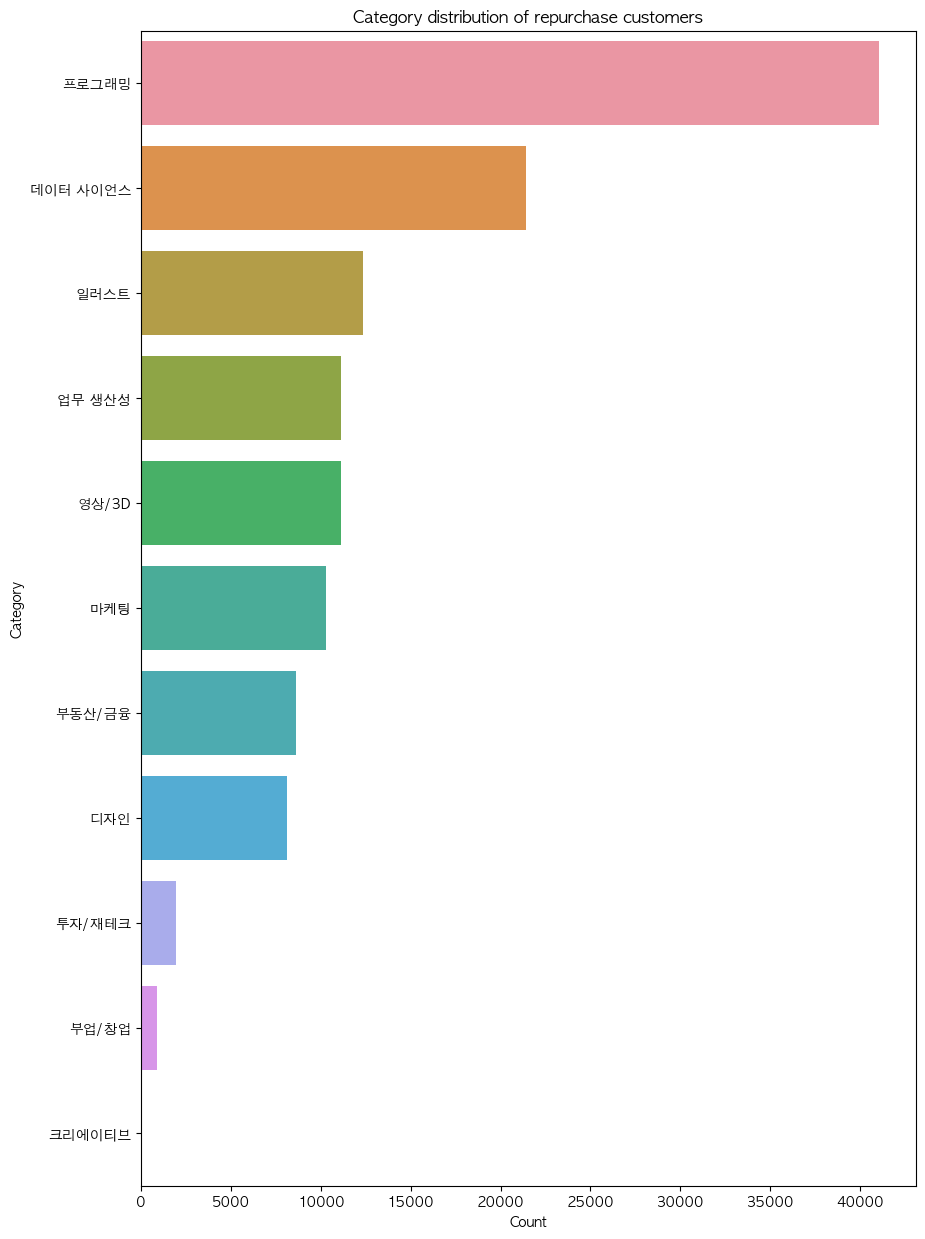

In [10]:
# 쿠폰을 사용한 고객 수
coupon_used = df_rep[df_rep['쿠폰이름'] != '-'].shape[0]

# 전체 고객 수
total_customers = df_rep.shape[0]

# 쿠폰을 사용한 고객의 비율
coupon_used_ratio = coupon_used / total_customers

print(f"쿠폰을 사용한 고객 수: {coupon_used}")
print(f"전체 고객 수: {total_customers}")
print(f"쿠폰을 사용한 고객의 비율: {coupon_used_ratio:.2f}")

# 카테고리별 구매 건수를 계산합니다.
category_counts = df_rep['카테고리'].value_counts().reset_index()
category_counts.columns = ['카테고리', 'counts']

# 큰 그림을 위해 figure size를 설정합니다.
plt.figure(figsize=(10, 15))

# 'counts'를 기준으로 내림차순 정렬합니다.
category_counts_sorted = category_counts.sort_values(by='counts', ascending=False)

# seaborn의 barplot 함수를 이용하여 막대 그래프를 그립니다.
sns.barplot(x='counts', y='카테고리', data=category_counts_sorted)

# 그래프의 제목을 설정합니다.
plt.title('Category distribution of repurchase customers')

# x축과 y축의 라벨을 설정합니다.
plt.xlabel('Count')
plt.ylabel('Category')

# 그래프를 출력합니다.
plt.show()

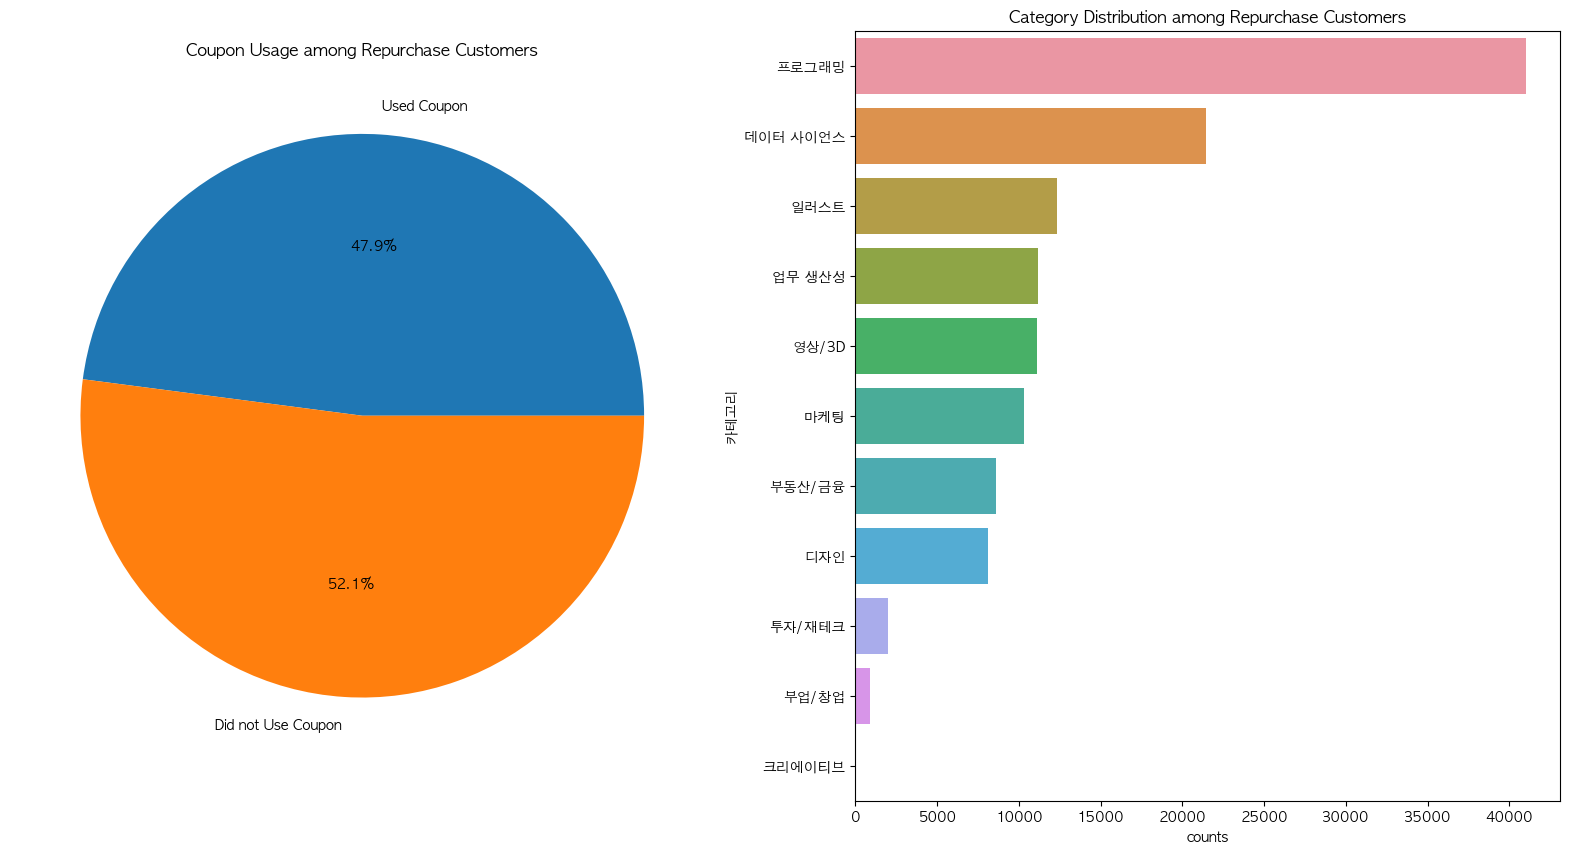

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # 1행 2열의 서브플롯 생성

# 쿠폰 사용 고객의 수와 비율을 파이 차트로 시각화
labels = ['Used Coupon', 'Did not Use Coupon']
sizes = [coupon_used, total_customers - coupon_used]
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title("Coupon Usage among Repurchase Customers")

# 카테고리별 구매 건수를 막대그래프로 시각화
sns.barplot(x='counts', y='카테고리', data=category_counts_sorted, ax=ax[1])
ax[1].set_title("Category Distribution among Repurchase Customers")

plt.show()

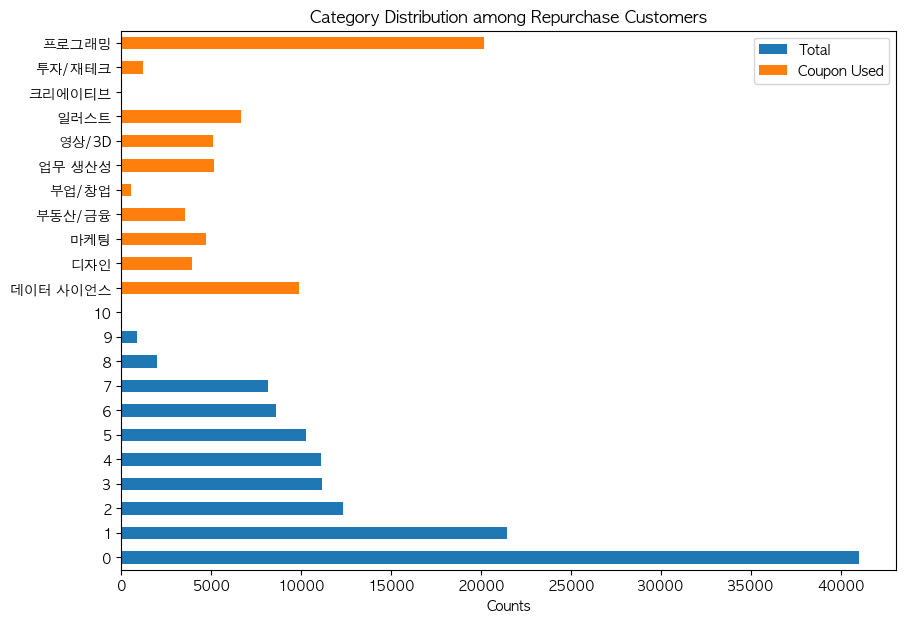

In [12]:
# 쿠폰 사용 고객의 카테고리별 구매 건수 계산
coupon_used_category_counts = df_rep[df_rep['쿠폰이름'] != '-']['카테고리'].value_counts()

# 데이터 프레임 생성
category_counts_df = pd.DataFrame({'Total': category_counts_sorted['counts'],
                                   'Coupon Used': coupon_used_category_counts})

# NaN 값은 0으로 채우기
category_counts_df.fillna(0, inplace=True)

# 카테고리별 구매 건수를 막대그래프로 시각화
category_counts_df.plot(kind='barh', stacked=True, figsize=(10, 7))

plt.title("Category Distribution among Repurchase Customers")
plt.xlabel("Counts")
plt.show()


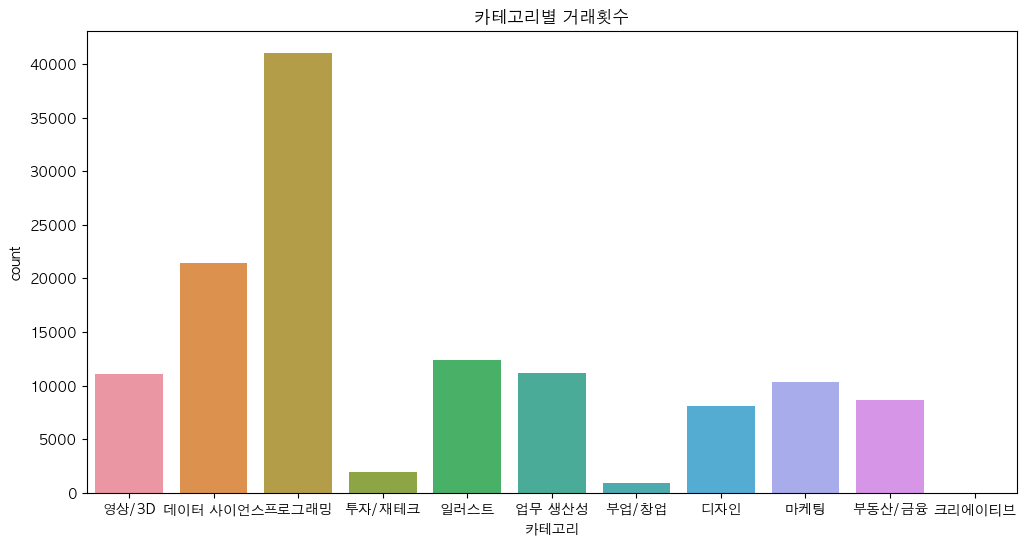

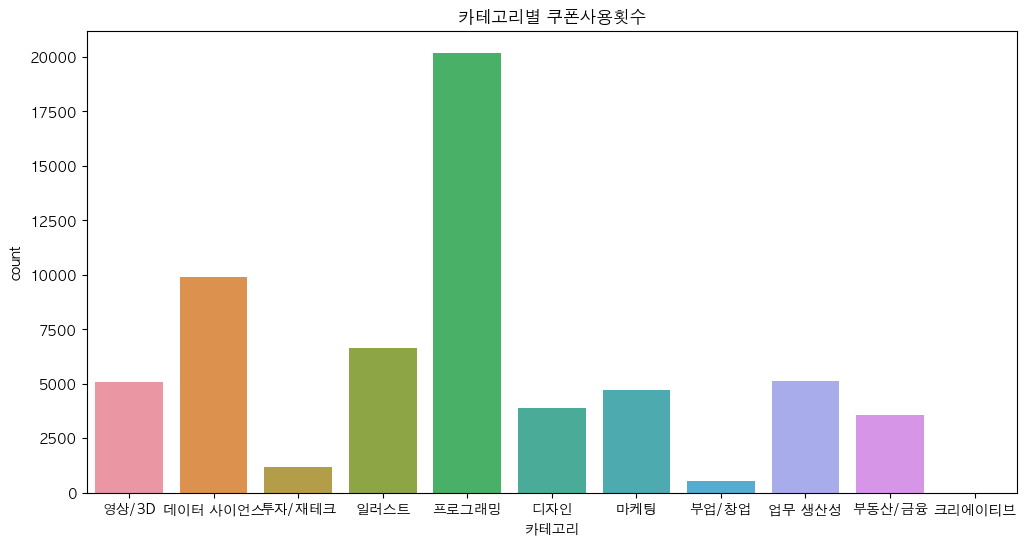

In [24]:
# 거래횟수 계산
total_transactions = df_rep['거래id'].count()

# 쿠폰사용횟수 계산
total_coupon_used = df_rep['쿠폰할인액'].notnull().sum()

# 카테고리별 거래횟수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=df_rep, x='카테고리')
plt.title('카테고리별 거래횟수')

# 카테고리별 쿠폰사용횟수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=df_rep[df_rep['쿠폰할인액'].notnull()], x='카테고리')
plt.title('카테고리별 쿠폰사용횟수')

plt.show()


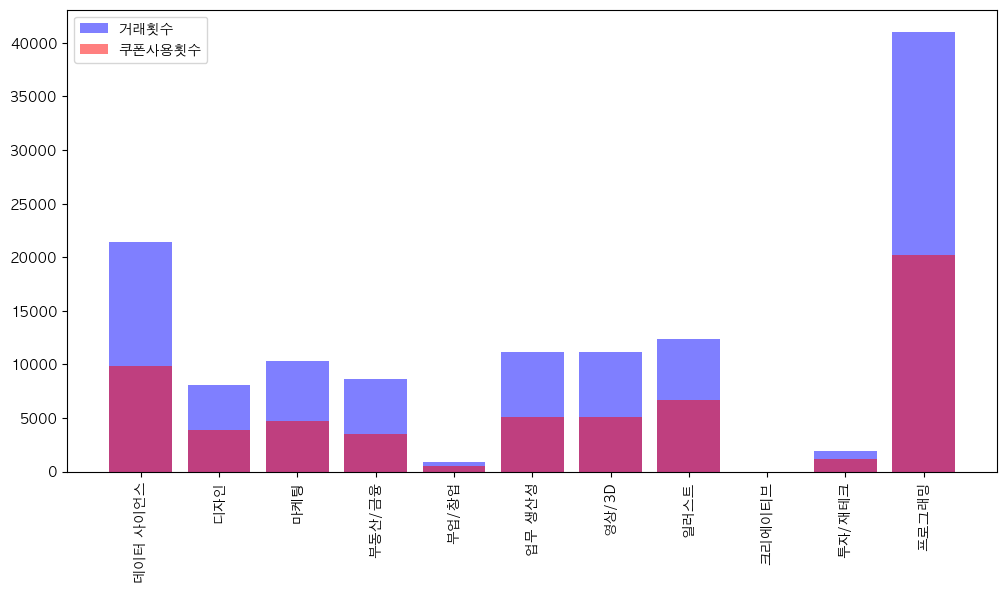

In [28]:
# 각 카테고리의 거래횟수와 쿠폰 사용횟수 계산
category_counts = df_rep['카테고리'].value_counts()
coupon_counts = df_rep[df_rep['쿠폰할인액'].notnull()]['카테고리'].value_counts()

# 데이터프레임으로 만들기
df_counts = pd.DataFrame({'거래횟수': category_counts, '쿠폰사용횟수': coupon_counts}).fillna(0)

# x축 위치
x = np.arange(len(df_counts))

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x, df_counts['거래횟수'], label='거래횟수', color='b', alpha=0.5)
plt.bar(x, df_counts['쿠폰사용횟수'], label='쿠폰사용횟수', color='r', alpha=0.5)

# x축 레이블
plt.xticks(x, df_counts.index, rotation='vertical')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


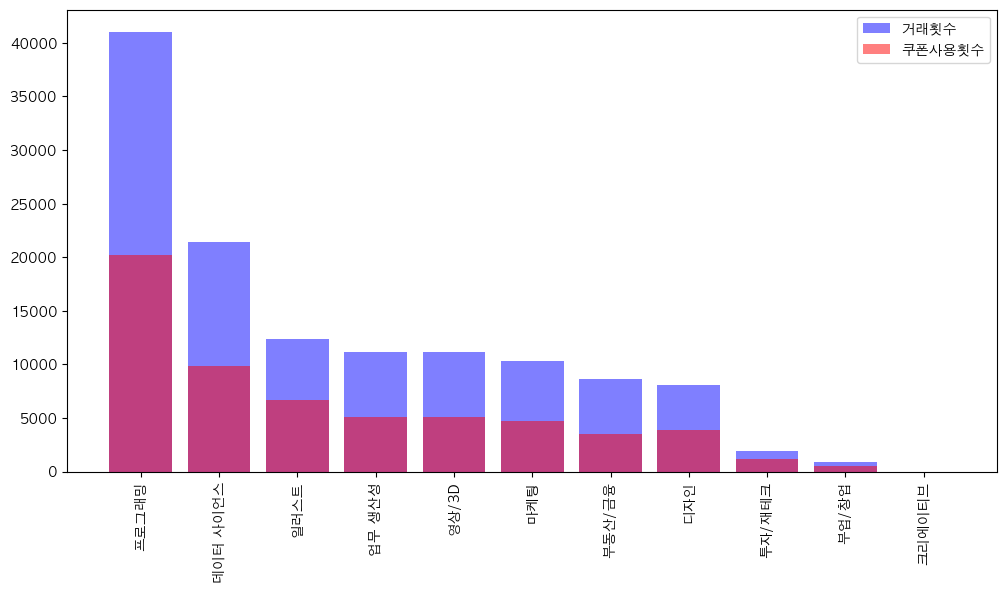

In [30]:
# '거래횟수'에 따라 내림차순 정렬
df_counts_sorted = df_counts.sort_values('거래횟수', ascending=False)

# x축 위치
x = np.arange(len(df_counts_sorted))

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x, df_counts_sorted['거래횟수'], label='거래횟수', color='b', alpha=0.5)
plt.bar(x, df_counts_sorted['쿠폰사용횟수'], label='쿠폰사용횟수', color='r', alpha=0.5)

# x축 레이블
plt.xticks(x, df_counts_sorted.index, rotation='vertical')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()



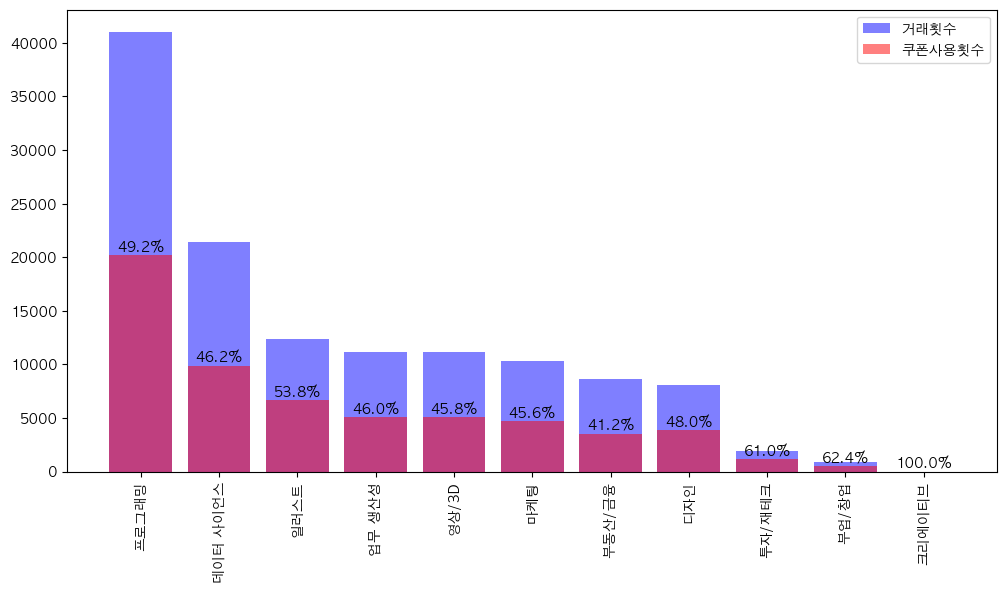

<Figure size 640x480 with 0 Axes>

In [49]:
# '거래횟수'에 따라 내림차순 정렬
df_counts_sorted = df_counts.sort_values('거래횟수', ascending=False)

# 쿠폰 사용률 계산
df_counts_sorted['쿠폰사용률(%)'] = (df_counts_sorted['쿠폰사용횟수'] / df_counts_sorted['거래횟수']) * 100

# x축 위치
x = np.arange(len(df_counts_sorted))

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
bar1 = plt.bar(x, df_counts_sorted['거래횟수'], label='거래횟수', color='b', alpha=0.5)
bar2 = plt.bar(x, df_counts_sorted['쿠폰사용횟수'], label='쿠폰사용횟수', color='r', alpha=0.5)

# x축 레이블
plt.xticks(x, df_counts_sorted.index, rotation='vertical')

# 쿠폰 사용률 텍스트 추가
for idx, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             '{:.1f}%'.format(df_counts_sorted.iloc[idx]['쿠폰사용률(%)']),
             ha='center', va='bottom')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

plt.savefig('카테고리 별 쿠폰사용량.png', dpi=100)


In [14]:
df_rep['쿠폰사용횟수'] = df_rep['쿠폰할인액'].notnull().sum()

In [38]:
category_sales = df_rep.groupby('카테고리')['실거래금액'].sum().sort_values(ascending=False)
category_sales


카테고리
프로그래밍       5330513000
데이터 사이언스    3484224029
부동산/금융      1748415005
일러스트        1710299189
영상/3D       1622577243
마케팅         1346889765
업무 생산성      1238221525
디자인         1086702320
투자/재테크       349136274
부업/창업         81487687
크리에이티브               0
Name: 실거래금액, dtype: int64

In [41]:
category_refunds = df_rep.groupby('카테고리')['환불금액'].sum().sort_values(ascending=True)
category_refunds

카테고리
프로그래밍       -557183047
데이터 사이언스    -386273611
일러스트        -186231966
영상/3D       -150117857
부동산/금융      -127750785
마케팅         -123315579
디자인         -122787240
업무 생산성      -100375830
투자/재테크       -33673676
부업/창업         -9888913
크리에이티브               0
Name: 환불금액, dtype: Int64

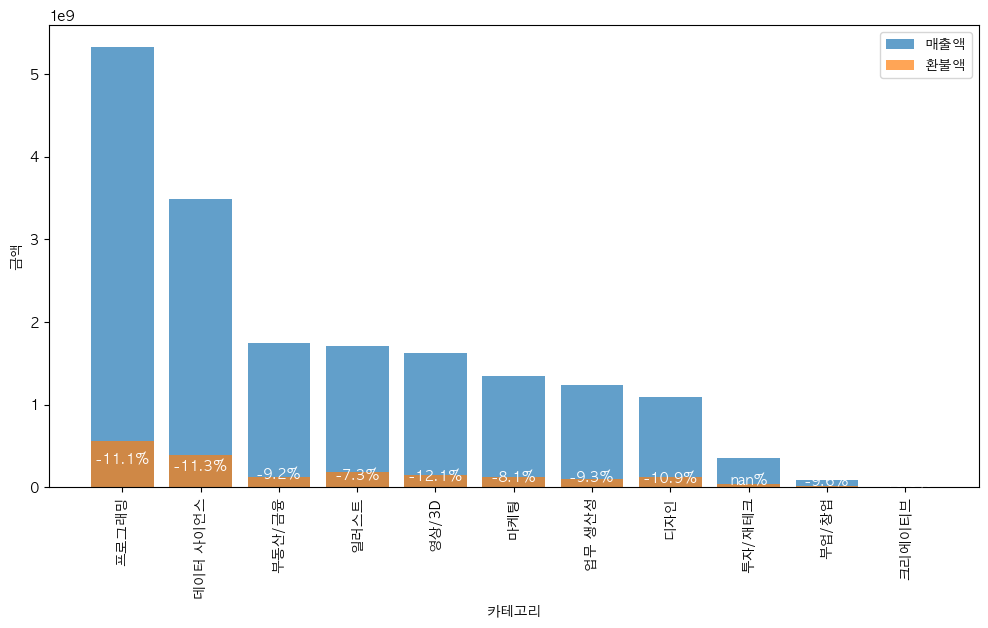

In [44]:
# 막대그래프 크기 설정
plt.figure(figsize=(12, 6))

# 매출액 막대그래프 그리기
plt.bar(category_sales.index, category_sales, label='매출액', alpha=0.7)

# 환불액 막대그래프 그리기 (마이너스 값으로 표시)
plt.bar(category_refunds.index, -category_refunds, label='환불액', alpha=0.7)

# 매출액 대비 환불액 비율 계산
refund_ratio = (category_refunds / category_sales) * 100

# 막대그래프 위에 비율 표시
for i, ratio in enumerate(refund_ratio):
    plt.text(i, -category_refunds[i] / 2, f'{ratio:.1f}%', ha='center', color='white')

# 축 레이블 설정
plt.xlabel('카테고리')
plt.ylabel('금액')

# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=90)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()



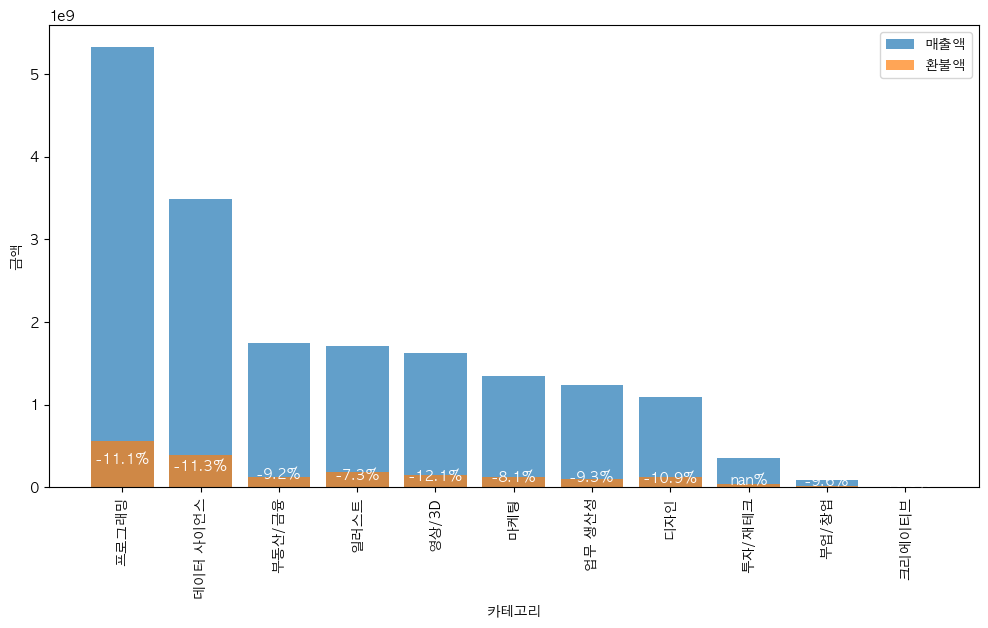

<Figure size 640x480 with 0 Axes>

In [48]:
# 막대그래프 크기 설정
plt.figure(figsize=(12, 6))

# 매출액 막대그래프 그리기
plt.bar(category_sales.index, category_sales, label='매출액', alpha=0.7)

# 환불액 막대그래프 그리기 (마이너스 값으로 표시)
plt.bar(category_refunds.index, -category_refunds, label='환불액', alpha=0.7)

# 매출액 대비 환불액 비율 계산
refund_ratio = (category_refunds / category_sales) * 100

# 막대그래프 위에 비율 표시
for i, ratio in enumerate(refund_ratio):
    plt.text(i, -category_refunds[i] / 2, f'{ratio:.1f}%', ha='center', color='white')

# 축 레이블 설정
plt.xlabel('카테고리')
plt.ylabel('금액')

# x축 레이블 회전 (가독성 향상)
plt.xticks(rotation=90)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

plt.savefig('매출액 대비 환불액.png', dpi=100)


In [45]:
print(category_refunds)

카테고리
프로그래밍       -557183047
데이터 사이언스    -386273611
일러스트        -186231966
영상/3D       -150117857
부동산/금융      -127750785
마케팅         -123315579
디자인         -122787240
업무 생산성      -100375830
투자/재테크       -33673676
부업/창업         -9888913
크리에이티브               0
Name: 환불금액, dtype: Int64


In [16]:
# 고객 ID 별 빈도 계산
id_counts = df_rep['고객id'].value_counts()

# 빈도를 데이터프레임에 추가
df_rep = df_rep.set_index('고객id')
df_rep['id_count'] = id_counts

# id_count를 기준으로 데이터프레임 정렬
df_rep = df_rep.sort_values(by='id_count', ascending=False)

# 인덱스를 재설정하고, id_count 컬럼 삭제
df_rep = df_rep.reset_index()
df_rep = df_rep.drop(columns='id_count')

#많이 결제한 순서대로 정렬한 data
df_rep

,고객id,index,거래id,유형,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,쿠폰사용횟수
0,89601,48863,2137708,PAYMENT,213160,FASTCAMPUS,올인원,영상/3D,올인원 패키지 : 프리프로덕션부터 배우는 모션 그래픽 프로젝트 완성,2022-09-13,[WELCOME] 온라인 강의 2만원 할인,129000,CARD,109000,20000,109000,<NA>,60863
1,89601,58060,2091682,PAYMENT,212777,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 데이터 분석을 위한 기초 통계 완전 정복,2022-08-28,-,99000,CARD,99000,<NA>,99000,<NA>,60863
2,89601,21188,2284013,PAYMENT,212668,FASTCAMPUS,올인원,프로그래밍,사이드 프로젝트 : 10개 기술스택으로 구현하는 풀스택 서버리스 프로젝트 with ...,2022-11-20,-,151000,CARD,151000,<NA>,151000,<NA>,60863
3,89601,142663,1629796,PAYMENT,208723,FASTCAMPUS,RED,데이터 사이언스,The RED : 우버처럼 하는 머신러닝 의사결정 by 정종빈,2022-01-30,[WELCOME] 처음이라면 누구나 The Red 5만원 할인,249000,CARD,199000,50000,199000,<NA>,60863
4,89601,103895,1831390,PAYMENT,206224,FASTCAMPUS,올인원,투자/재테크,초격차 패키지 : 한 번에 끝내는 부동산 경매/공매,2022-05-04,[프로모션] 4월 100% 페이백 이벤트,354000,CARD,95000,259000,95000,<NA>,60863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126970,65679,105225,1826582,PAYMENT,210120,FASTCAMPUS,올인원,데이터 사이언스,초격차 패키지 : 직장인을 위한 파이썬 데이터 분석,2022-05-02,[프로모션] 4월 100% 페이백 이벤트,170000,PROMOTION,0,175000,0,<NA>,60863
126971,4754,43836,2169689,PAYMENT,212600,FASTCAMPUS,올인원,일러스트,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,2022-09-27,-,500000,CARD,500000,<NA>,500000,<NA>,60863
126972,11923,105229,1826570,PAYMENT,202674,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 수학적으로 접근하는 딥러닝,2022-05-02,[5월 쿠폰]온라인 강의 2만원 할인,197000,CARD,177000,20000,177000,<NA>,60863
126973,7469,105230,1826568,PAYMENT,202613,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 네트워크와 보안 핵심 요약,2022-05-02,[프로모션] 4월 100% 페이백 이벤트,174000,PROMOTION,0,177000,0,<NA>,60863


In [17]:
df_rep.groupby('고객id')['카테고리'].value_counts()
#이 코드는 df_rep 데이터프레임에서 '고객id'를 기준으로 그룹화를 한 후, 각 그룹에서 '카테고리' 컬럼의 값들을 카운트합니다.
#groupby('고객id'): 이는 '고객id'를 기준으로 데이터를 그룹화하라는 명령입니다. 이렇게 하면 같은 '고객id'를 가진 행들이 하나의 그룹으로 묶이게 됩니다.
#['카테고리'].value_counts(): 이는 각 그룹에서 '카테고리' 컬럼의 값들을 세는 것입니다. 즉, 각 '고객id' 그룹 내에서 '카테고리' 값이 몇 번 나타나는지를 카운트합니다.
#따라서, 이 코드는 각 '고객id'가 어떤 '카테고리'의 제품을 얼마나 구매하였는지를 집계하는 것입니다. 결과는 멀티인덱스 시리즈로 나타나며,
    ##첫 번째 레벨의 인덱스는 '고객id'이고, 두 번째 레벨의 인덱스는 '카테고리'입니다. 값은 해당 '고객id'와 '카테고리'의 조합이 데이터에서 몇 번 나타나는지를 나타냅니다.

고객id   카테고리    
10     데이터 사이언스    2
       프로그래밍       2
       일러스트        1
       마케팅         1
       디자인         1
                  ..
99998  데이터 사이언스    2
       투자/재테크      1
       업무 생산성      1
       디자인         1
       프로그래밍       1
Name: count, Length: 107501, dtype: int64

In [18]:
df_rep[df_rep['고객id'] == '10002']

,고객id,index,거래id,유형,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,쿠폰사용횟수
4096,10002,24043,2270174,PAYMENT,207766,FASTCAMPUS,올인원,영상/3D,이필성의 포토클래스 시선을 사로잡는 특별한 사진을 만드는 법 Online.,2022-11-13,[WELCOME] 온라인 강의 2만원 할인,176000,POINT,156000,20000,156000,<NA>,60863
5972,10002,64190,2060070,PAYMENT,204366,FASTCAMPUS,올인원,마케팅,올인원 패키지 : 30개 글감으로 에세이 작가되기 BY.정영욱,2022-08-14,-,143500,CARD,143500,<NA>,143500,<NA>,60863
8322,10002,119952,1741333,REFUND,202613,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 네트워크와 보안 핵심 요약,2022-03-21,-,172000,CARD,-172000,<NA>,<NA>,-172000,60863
10640,10002,3112,2391184,PAYMENT,212599,FASTCAMPUS,올인원,일러스트,네오아카데미 : 까나의 초보자를 위한 SD 미니 캐릭터 그리기,2022-12-26,[WELCOME] 디자인 3만원할인,163000,TRANS,133000,30000,133000,<NA>,60863
12162,10002,73137,2006444,PAYMENT,202301,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : C++ 실력완성,2022-07-22,[프로모션] 6월 1+1 이벤트,210000,PROMOTION,0,321000,0,<NA>,60863


In [19]:
df_rep['실거래금액'].value_counts()
df_rep['실거래금액'].sum()

17998466037

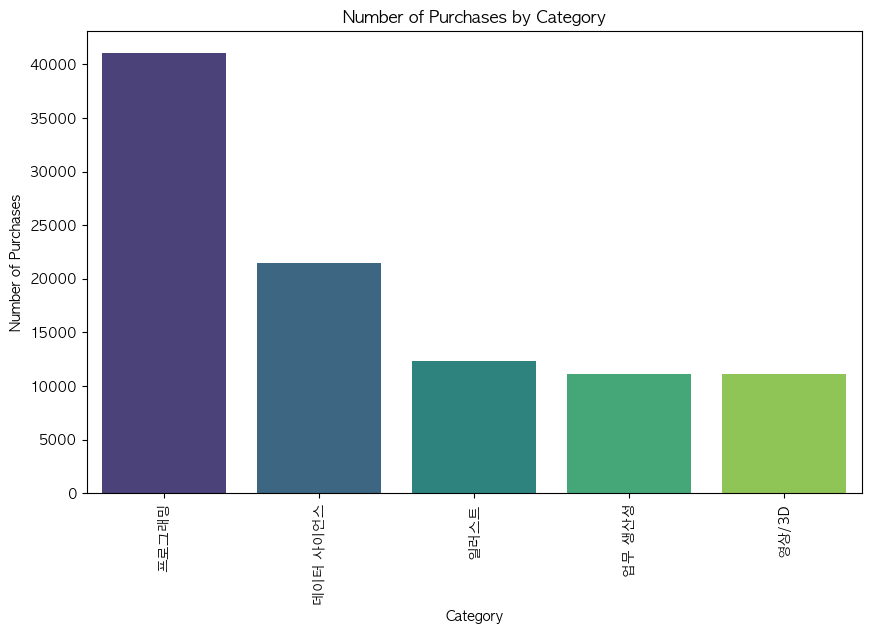

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 카테고리별 구매 횟수 계산
category_counts = df_rep['카테고리'].value_counts().head(5)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Number of Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90) # x축 레이블이 겹치지 않도록 회전
plt.show()

In [21]:
# '고객id'로 그룹화하고, 각 그룹 내에서 '거래 횟수'와 '쿠폰 사용 횟수'를 세어 새로운 데이터프레임을 만듭니다.
df_agg = df_rep.groupby('고객id').agg({'고객id':'count', '쿠폰할인액':'count'})

# 새로운 데이터프레임에서 '거래 횟수'와 '쿠폰 사용 횟수' 사이의 상관관계를 계산합니다.
correlation = df_agg['고객id'].corr(df_agg['쿠폰할인액'])

print(correlation)


0.47531489874599375


In [260]:
import sys
sys.path.append('../modules/')
from trans_date import trans_date

In [261]:
data = pd.read_csv('./실습데이터.csv')
data['거래일자'] = data['거래일자'].apply(trans_date)
data

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,-,289000,VBANK,289000,-,289000,-


In [262]:
data.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액'],
      dtype='object')

In [263]:
# '고객id' 별로 그룹을 묶고, 각 그룹의 크기를 계산
group_sizes = data.groupby('고객id').size()

# 'Customer_Type' 컬럼을 설정
df_new = data.copy()
for idx, row in df_new.iterrows():
    if group_sizes[row['고객id']] >= 2:
        df_new.loc[idx, 'cus_type'] = 'cus_rep'
    else:
        df_new.loc[idx, 'cus_type'] = 'cus_comm'

In [264]:
df_new = df_new.sort_values(by=['거래일자'])

In [265]:
df_new.reset_index(drop=True, inplace=True)

In [266]:
## 판매가격을 int로 변환
df_new['판매가격'] = pd.to_numeric(df['판매가격'], errors='coerce').astype('Int64')
df_new['쿠폰할인액'] = pd.to_numeric(df['쿠폰할인액'], errors='coerce').astype('Int64')
df_new['거래금액'] = pd.to_numeric(df['거래금액'], errors='coerce').astype('Int64')
df_new['환불금액'] = pd.to_numeric(df['환불금액'], errors='coerce').astype('Int64')
df_new['거래id'] = pd.to_numeric(df['거래id'], errors='coerce').astype('str')
df_new['고객id'] = pd.to_numeric(df['고객id'], errors='coerce').astype('str')
df_new['코스ID'] = pd.to_numeric(df['코스ID'], errors='coerce').astype('str')

In [267]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   거래id       159328 non-null  object        
 1   유형         159328 non-null  object        
 2   고객id       159328 non-null  object        
 3   코스ID       159328 non-null  object        
 4   사이트        159328 non-null  object        
 5   포맷         159328 non-null  object        
 6   카테고리       159328 non-null  object        
 7   코스(상품) 이름  159328 non-null  object        
 8   거래일자       159328 non-null  datetime64[ns]
 9   쿠폰이름       159328 non-null  object        
 10  판매가격       159269 non-null  Int64         
 11  결제수단       159328 non-null  object        
 12  실거래금액      159328 non-null  int64         
 13  쿠폰할인액      76382 non-null   Int64         
 14  거래금액       148010 non-null  Int64         
 15  환불금액       11318 non-null   Int64         
 16  cus_type   159328 no

In [268]:
df_new['유형'].unique()

array(['PAYMENT', 'REFUND'], dtype=object)

In [269]:
df_new.groupby('유형').size()

유형
PAYMENT    148010
REFUND      11318
dtype: int64

In [270]:
df_new

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,cus_type
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,189000,CARD,207000,<NA>,159000,<NA>,cus_comm
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,501000,CARD,385000,<NA>,501000,<NA>,cus_rep
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 React의 모든 것,2022-01-01 00:01:18,-,549000,POINT,232000,<NA>,549000,<NA>,cus_comm
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화,2022-01-01 00:01:20,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,165000,CARD,168000,30000,135000,<NA>,cus_rep
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,239000,CARD,136000,<NA>,239000,<NA>,cus_rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터,2022-12-31 23:12:58,[2만원 할인] 랜선사수 피도리와 함께하는 생존 PPT 마스터,217000,CARD,110000,10000,207000,<NA>,cus_rep
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,2022-12-31 23:12:58,[WELCOME] 프로그래밍 3만원할인,385000,CARD,155000,<NA>,385000,<NA>,cus_rep
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,부동산/금융,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간...,2022-12-31 23:12:58,-,166000,CARD,868000,30000,136000,<NA>,cus_rep
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 AWS 기반 아키텍처 설계와 DevOps,2022-12-31 23:12:59,"[120,000원 할인 쿠폰] [한 번에 끝내는 AWS 기반 아키텍처 설계와 Dev...",289000,CARD,70000,<NA>,289000,<NA>,cus_rep


In [271]:
print(df_new['코스(상품) 이름'].nunique)
print(df_new['코스ID'].nunique)

<bound method IndexOpsMixin.nunique of 0                   올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드
1         [Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...
2                            초격차 패키지 : 한 번에 끝내는 React의 모든 것
3                       올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화
4                       올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP
                                ...                        
159323                  올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터
159324                      초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것
159325    올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간...
159326            초격차 패키지 : 한 번에 끝내는 AWS 기반 아키텍처 설계와 DevOps
159327                         초격차 패키지 : 딥러닝·인공지능 Signature
Name: 코스(상품) 이름, Length: 159328, dtype: object>
<bound method IndexOpsMixin.nunique of 0         209016
1         210664
2         211782
3         213450
4         210773
           ...  
159323    204491
159324    206811
159325    202927
159326    208104
159327    207488
Name: 코스ID, Length: 159328,

In [272]:
# cus_type이 cus_rep인 value를 선택하고 cus_type제거, index를 초기화한 dataframe 생성
df_rep = df_new[df_new['cus_type'] == 'cus_rep']
df_rep = df_rep.drop('cus_type', axis=1)
df_rep = df_rep.reset_index(drop=False, inplace=False)
df_rep

,index,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,501000,CARD,385000,<NA>,501000,<NA>
1,3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화,2022-01-01 00:01:20,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,165000,CARD,168000,30000,135000,<NA>
2,4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,239000,CARD,136000,<NA>,239000,<NA>
3,5,2413886,PAYMENT,47039,210773,FASTCAMPUS,올인원,부동산/금융,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초 (수강시간...,2022-01-01 00:01:26,-,239000,CARD,280000,<NA>,239000,<NA>
4,6,2413879,PAYMENT,81643,207628,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 코딩 첫 걸음 프로젝트,2022-01-01 00:01:30,-,213000,CARD,163000,<NA>,213000,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126970,159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터,2022-12-31 23:12:58,[2만원 할인] 랜선사수 피도리와 함께하는 생존 PPT 마스터,217000,CARD,110000,10000,207000,<NA>
126971,159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,2022-12-31 23:12:58,[WELCOME] 프로그래밍 3만원할인,385000,CARD,155000,<NA>,385000,<NA>
126972,159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,부동산/금융,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간...,2022-12-31 23:12:58,-,166000,CARD,868000,30000,136000,<NA>
126973,159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 AWS 기반 아키텍처 설계와 DevOps,2022-12-31 23:12:59,"[120,000원 할인 쿠폰] [한 번에 끝내는 AWS 기반 아키텍처 설계와 Dev...",289000,CARD,70000,<NA>,289000,<NA>


In [175]:
df_rep_sorted = df_rep.sort_values(['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 재구매간격 출력
print(df_rep_sorted[['고객id', '거래일자', '재구매간격']])

        고객id                거래일자             재구매간격
39881      0 2022-04-18 13:04:07               NaT
50280      1 2022-05-31 16:05:32               NaT
63622     10 2022-07-09 20:07:34               NaT
69121     10 2022-07-24 17:07:50  14 days 21:00:16
78537     10 2022-08-21 19:08:05  28 days 02:00:15
...      ...                 ...               ...
66030  99994 2022-07-18 02:07:23 182 days 05:05:40
22520  99996 2022-02-20 21:02:51               NaT
89449  99996 2022-09-18 16:09:02 209 days 19:06:11
61389  99997 2022-07-04 20:07:48               NaT
21488  99999 2022-02-16 07:02:10               NaT

[126975 rows x 3 columns]


In [176]:
# '포맷' 컬럼을 추가하여 정렬
df_rep_sorted['포맷'] = df_rep_sorted.groupby('고객id')['포맷'].ffill()

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 재구매 기간을 포맷에 따라 그룹화하여 평균 재구매 기간 계산
df_repurchase_period = df_rep_sorted.groupby('포맷')['재구매간격'].mean()

# 결과 출력
print(df_repurchase_period)

포맷
RED    98 days 07:58:02.843376264
올인원   103 days 21:18:08.619983072
Name: 재구매간격, dtype: timedelta64[ns]


In [177]:
# 고객id와 거래일자로 그룹화하고 정렬
df_rep_sorted = df_rep.sort_values(['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 포맷에 따라 재구매간격 분류
df_rep_sorted['재구매간격_포맷'] = pd.cut(df_rep_sorted['재구매간격'].dt.days, bins=[-np.inf, 7, 30, 90, np.inf], labels=['1주일 이내', '1개월 이내', '3개월 이내', '3개월 이후'])

# 재구매간격 출력
print(df_rep_sorted[['고객id', '거래일자', '재구매간격', '재구매간격_포맷']])

        고객id                거래일자             재구매간격 재구매간격_포맷
39881      0 2022-04-18 13:04:07               NaT      NaN
50280      1 2022-05-31 16:05:32               NaT      NaN
63622     10 2022-07-09 20:07:34               NaT      NaN
69121     10 2022-07-24 17:07:50  14 days 21:00:16   1개월 이내
78537     10 2022-08-21 19:08:05  28 days 02:00:15   1개월 이내
...      ...                 ...               ...      ...
66030  99994 2022-07-18 02:07:23 182 days 05:05:40   3개월 이후
22520  99996 2022-02-20 21:02:51               NaT      NaN
89449  99996 2022-09-18 16:09:02 209 days 19:06:11   3개월 이후
61389  99997 2022-07-04 20:07:48               NaT      NaN
21488  99999 2022-02-16 07:02:10               NaT      NaN

[126975 rows x 4 columns]


In [178]:
# 고객id와 거래일자로 그룹화하고 정렬
df_rep_sorted = df_rep.sort_values(['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매간격'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 포맷에 따라 재구매간격 분류
df_rep_sorted['포맷'] = df_rep_sorted.groupby('고객id')['포맷'].ffill()
df_rep_sorted['재구매간격_포맷'] = df_rep_sorted.groupby('포맷')['재구매간격'].transform(lambda x: pd.cut(x.dt.days, bins=[-np.inf, 7, 30, 90, np.inf], labels=['1주일 이내', '1개월 이내', '3개월 이내', '3개월 이후']))

# 재구매간격 출력
print(df_rep_sorted[['고객id', '거래일자', '포맷', '재구매간격', '재구매간격_포맷']])


        고객id                거래일자   포맷             재구매간격 재구매간격_포맷
39881      0 2022-04-18 13:04:07  올인원               NaT      NaN
50280      1 2022-05-31 16:05:32  올인원               NaT      NaN
63622     10 2022-07-09 20:07:34  올인원               NaT      NaN
69121     10 2022-07-24 17:07:50  올인원  14 days 21:00:16   1개월 이내
78537     10 2022-08-21 19:08:05  올인원  28 days 02:00:15   1개월 이내
...      ...                 ...  ...               ...      ...
66030  99994 2022-07-18 02:07:23  올인원 182 days 05:05:40   3개월 이후
22520  99996 2022-02-20 21:02:51  올인원               NaT      NaN
89449  99996 2022-09-18 16:09:02  올인원 209 days 19:06:11   3개월 이후
61389  99997 2022-07-04 20:07:48  RED               NaT      NaN
21488  99999 2022-02-16 07:02:10  올인원               NaT      NaN

[126975 rows x 5 columns]


In [179]:
# '포맷' 컬럼 값에 따라 데이터프레임 분할
df_format_올인원 = df_rep_sorted[df_rep_sorted['포맷'] == '올인원']
df_format_더레드 = df_rep_sorted[df_rep_sorted['포맷'] == 'RED']

In [180]:
# 분할된 데이터프레임 출력
df_format_올인원

,index,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,재구매간격,재구매간격_포맷
39881,50188,2132927,PAYMENT,0,211368,FASTCAMPUS,올인원,데이터 사이언스,초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능,2022-04-18 13:04:07,-,195000,TRANSFER,243000,30000,165000,<NA>,NaT,NaN
50280,63208,2062634,PAYMENT,1,203178,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,2022-05-31 16:05:32,-,215000,CARD,197000,197000,18000,<NA>,NaT,NaN
63622,79959,1969997,PAYMENT,10,206185,FASTCAMPUS,올인원,영상/3D,3D 캐릭터를 가장 쉽게 만드는 법: 아이패드 모델링,2022-07-09 20:07:34,[4만원 할인 쿠폰] 안심팩토리의 [3D 캐릭터를 가장 쉽게 만드는 법: 아이패드 ...,247000,POINT,139000,<NA>,247000,<NA>,NaT,NaN
69121,86801,1933897,PAYMENT,10,204670,FASTCAMPUS,올인원,프로그래밍,초단기 완성 : 14일 만에 만드는 스타벅스 웹 사이트 with HTML&CSS,2022-07-24 17:07:50,-,194000,CARD,49000,<NA>,194000,<NA>,14 days 21:00:16,1개월 이내
78537,98500,1864937,PAYMENT,10,211160,FASTCAMPUS,올인원,일러스트,Live2D로 만드는 버츄얼 캐릭터 : 일러스트부터 리깅까지,2022-08-21 19:08:05,[루냐] 트위터 팔로워 한정 3만원 할인 쿠폰 (~22/08/28),149000,POINT,166000,29800,119200,<NA>,28 days 02:00:15,1개월 이내
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9305,11760,2336228,PAYMENT,99994,203934,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,2022-01-16 21:01:43,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,156000,CARD,180000,169000,0,<NA>,NaT,NaN
66030,82949,1957593,PAYMENT,99994,209074,FASTCAMPUS,올인원,일러스트,올인원 패키지 : star741의 캐주얼 일러스트 드로잉,2022-07-18 02:07:23,[WELCOME] 온라인 강의 20%할인,203000,TRANS,219000,196000,7000,<NA>,182 days 05:05:40,3개월 이후
22520,28376,2244509,PAYMENT,99996,213780,FASTCAMPUS,올인원,영상/3D,초격차 패키지 : 한번에 끝내는 모션그래픽,2022-02-20 21:02:51,-,119000,CARD,182000,<NA>,119000,<NA>,NaT,NaN
89449,112228,1780308,PAYMENT,99996,204342,FASTCAMPUS,올인원,데이터 사이언스,"올인원 패키지 : 가장 쉽게 시작하는 데이터 분석, SQL 유치원",2022-09-18 16:09:02,-,184000,CARD,197000,<NA>,184000,<NA>,209 days 19:06:11,3개월 이후


In [181]:
# 분할된 데이터프레임 출력
df_format_더레드

,index,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,재구매간격,재구매간격_포맷
81601,102326,1840950,PAYMENT,10,205949,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD 실전편 : 설계 확장성을 위한 코드 개선 방법...,2022-08-30 07:08:05,[20% 할인 쿠폰] The RED : 현실 세상의 TDD 실전편 20% 할인 쿠폰,192000,CARD,119200,<NA>,192000,<NA>,8 days 12:00:00,1개월 이내
51069,64190,2060070,PAYMENT,10002,204366,FASTCAMPUS,RED,데이터 사이언스,The Red : 딥러닝 뉴럴네트워크 GNN,2022-06-03 16:06:08,CRM_RED 검수용 쿠폰,143500,PROMOTION,0,<NA>,143500,<NA>,113 days 13:04:01,3개월 이후
58201,73137,2006444,PAYMENT,10002,202301,FASTCAMPUS,RED,마케팅,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,2022-06-26 21:06:29,-,210000,CARD,194000,321000,0,<NA>,23 days 05:00:21,1개월 이내
89984,112911,1777517,REFUND,1004,203047,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD by 이규원,2022-09-19 16:09:35,-,256000,CARD,-154153,253000,3000,<NA>,253 days 02:08:35,3개월 이후
54329,68284,2034923,PAYMENT,10056,211087,FASTCAMPUS,RED,디자인,The RED : Figma로 끝내는 모바일 UXUI 디자인 프로젝트 Kit,2022-06-12 22:06:10,-,180000,CARD,365000,30000,150000,<NA>,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92431,115979,1762515,PAYMENT,99944,203655,FASTCAMPUS,RED,데이터 사이언스,The RED : Meta 연구원 문경식의 단일 이미지 인식을 통한 Human Po...,2022-09-29 02:09:13,-,355000,CARD,384000,<NA>,355000,<NA>,96 days 13:02:17,3개월 이후
13616,17156,2309350,PAYMENT,99960,204013,FASTCAMPUS,RED,업무 생산성,The RED : 1조 기업 가치를 만들어 낸 경영 원칙 by 신현성,2022-01-31 12:01:43,-,259000,POINT,172000,<NA>,<NA>,-129500,NaT,NaN
20642,25989,2259357,PAYMENT,99978,206185,FASTCAMPUS,RED,프로그래밍,The RED : 모든 비즈니스를 성공으로 이끄는 Product Management...,2022-02-12 10:02:59,-,249000,CARD,229000,<NA>,249000,<NA>,NaT,NaN
62799,78914,1975599,PAYMENT,99990,207766,FASTCAMPUS,RED,부동산/금융,The RED : 박지웅의 8천억 원 가치의 회사를 만드는 컴퍼니빌딩,2022-07-07 23:07:43,-,172000,CARD,179200,<NA>,172000,<NA>,NaT,NaN


In [183]:
total_sales_올인원 = df_format_올인원['거래금액'].sum()
total_sales_올인원

18267186133

In [184]:
total_sales_더레드 = df_format_더레드['거래금액'].sum()
total_sales_더레드

1522085417

In [188]:
# '유형' 컬럼 값이 'PAYMENT'인 데이터프레임 추출
df_payment = df_format_더레드[df_format_더레드['유형'] == 'PAYMENT']

# 거래횟수 계산
transaction_count_더레드 = df_format_더레드['유형'].count()

# 매출 계산
total_sales_더레드 = df_format_더레드['거래금액'].sum()

print("거래횟수:", transaction_count)
print("매출:", total_sales)

거래횟수: 117056
매출: 18267186133


In [189]:
# '유형' 컬럼 값이 'PAYMENT'인 데이터프레임 추출
df_payment = df_format_올인원[df_format_올인원['유형'] == 'PAYMENT']

# 거래횟수 계산
transaction_count_올인원 = df_format_올인원['유형'].count()

# 매출 계산
total_sales_올인원 = df_format_올인원['거래금액'].sum()

print("거래횟수:", transaction_count)
print("매출:", total_sales)

거래횟수: 117056
매출: 18267186133


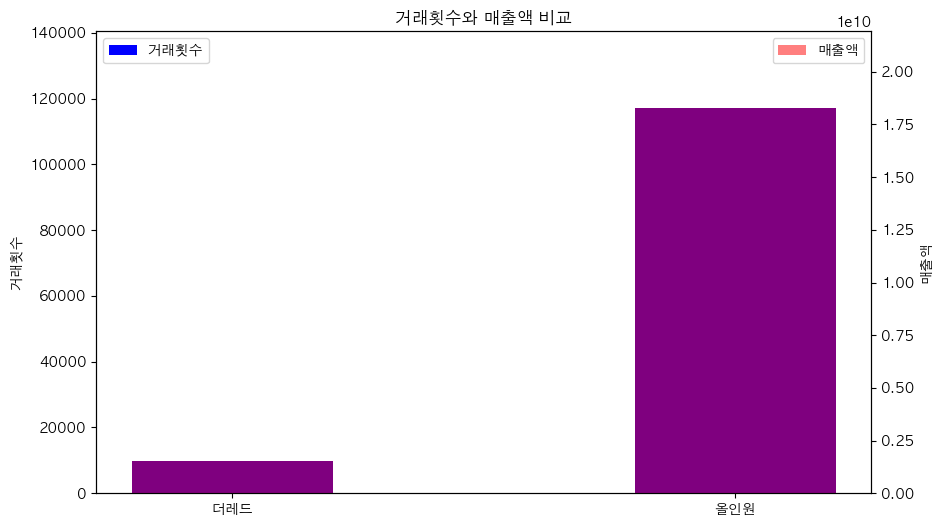

In [193]:
# 거래횟수 바 그래프
fig, ax1 = plt.subplots(figsize=(10, 6))
x1 = ['더레드', '올인원']
width = 0.4

# 거래횟수 비교
transaction_counts = [transaction_count_더레드, transaction_count_올인원]
ax1.bar(x1, transaction_counts, width, label='거래횟수', color='b')
ax1.set_ylabel('거래횟수')
ax1.set_ylim([0, max(transaction_counts) * 1.2])

# 매출액 바 그래프
ax2 = ax1.twinx()
x2 = ['더레드', '올인원']
sales_totals = [total_sales_더레드, total_sales_올인원]
ax2.bar(x2, sales_totals, width, label='매출액', alpha=0.5, color='r')
ax2.set_ylabel('매출액')
ax2.set_ylim([0, max(sales_totals) * 1.2])

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('거래횟수와 매출액 비교')
plt.show()


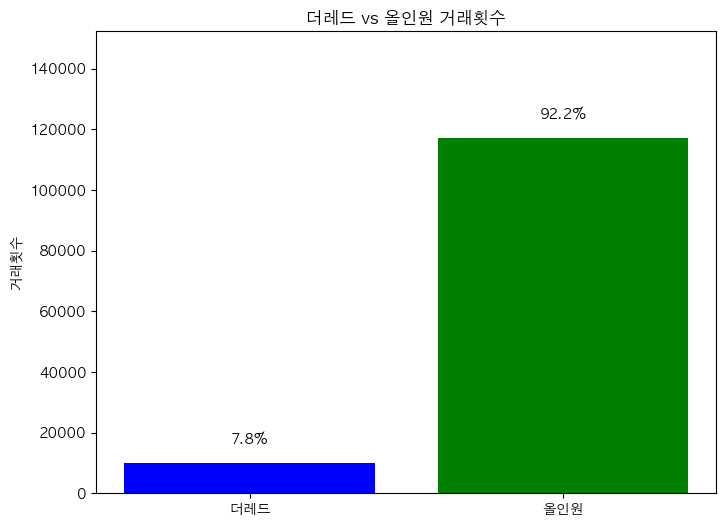

In [197]:
import matplotlib.pyplot as plt

# 거래횟수 비교 막대그래프
fig, ax = plt.subplots(figsize=(8, 6))

x = ['더레드', '올인원']
transaction_counts = [transaction_count_더레드, transaction_count_올인원]
total_transaction_count = sum(transaction_counts)

ax.bar(x, transaction_counts, color=['b', 'g'])
ax.set_ylabel('거래횟수')
ax.set_title('더레드 vs 올인원 거래횟수')
ax.set_ylim([0, total_transaction_count * 1.2])

# 거래횟수 비율 표시
for i, v in enumerate(transaction_counts):
    percentage = v / total_transaction_count * 100
    ax.text(i, v + total_transaction_count * 0.05, f'{percentage:.1f}%', ha='center')

plt.show()


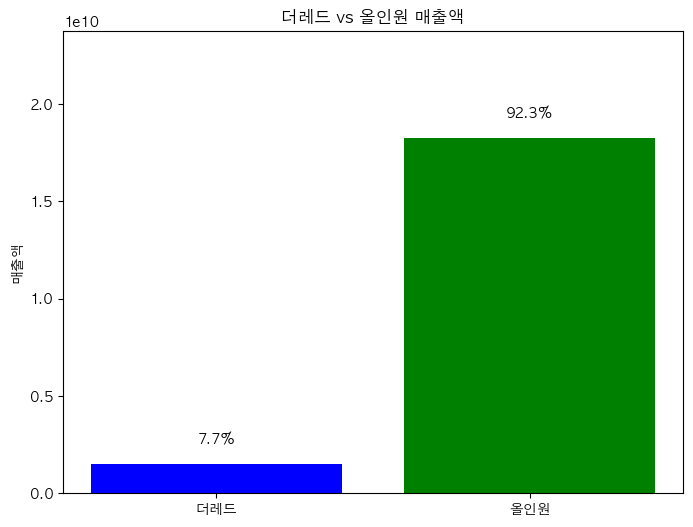

In [198]:
import matplotlib.pyplot as plt

# 매출 비교 막대그래프
fig, ax = plt.subplots(figsize=(8, 6))

x = ['더레드', '올인원']
total_sales = [total_sales_더레드, total_sales_올인원]
total_sales_sum = sum(total_sales)

ax.bar(x, total_sales, color=['b', 'g'])
ax.set_ylabel('매출액')
ax.set_title('더레드 vs 올인원 매출액')
ax.set_ylim([0, total_sales_sum * 1.2])

# 매출 비율 표시
for i, v in enumerate(total_sales):
    percentage = v / total_sales_sum * 100
    ax.text(i, v + total_sales_sum * 0.05, f'{percentage:.1f}%', ha='center')

plt.show()


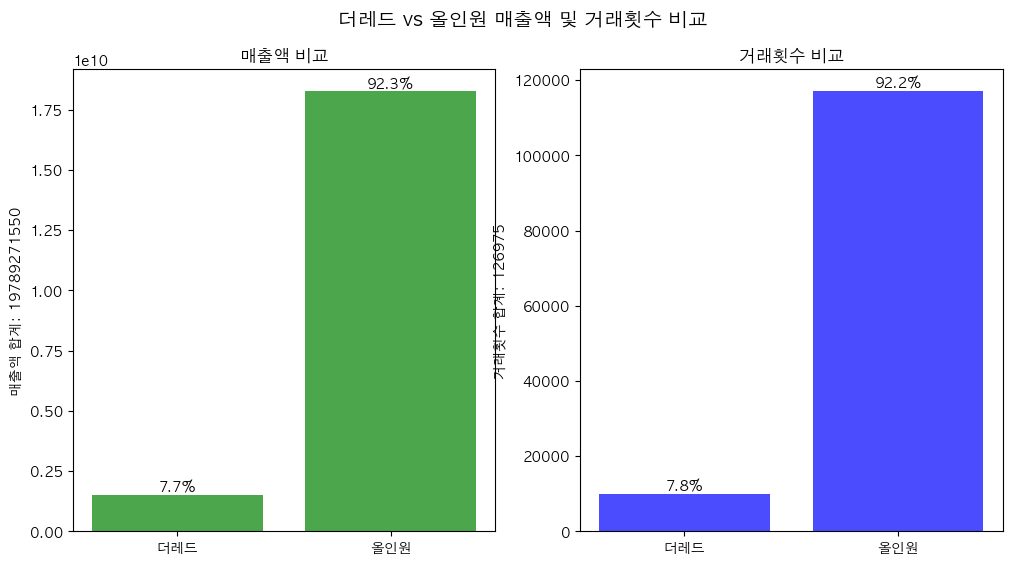

In [203]:
# 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 왼쪽 그래프: 매출액 비교
axes[0].bar(['더레드', '올인원'], [total_sales_더레드, total_sales_올인원], color='g', alpha=0.7)
axes[0].set_title('매출액 비교')
axes[0].set_ylabel('매출액 합계: {}'.format(total_sales_더레드 + total_sales_올인원))

# 왼쪽 그래프 내부에 비율 표시
for i, v in enumerate([total_sales_더레드, total_sales_올인원]):
    axes[0].text(i, v, '{:.1%}'.format(v / (total_sales_더레드 + total_sales_올인원)), ha='center', va='bottom')

# 오른쪽 그래프: 거래횟수 비교
axes[1].bar(['더레드', '올인원'], [transaction_count_더레드, transaction_count_올인원], color='b', alpha=0.7)
axes[1].set_title('거래횟수 비교')
axes[1].set_ylabel('거래횟수 합계: {}'.format(transaction_count_더레드 + transaction_count_올인원))

# 오른쪽 그래프 내부에 비율 표시
for i, v in enumerate([transaction_count_더레드, transaction_count_올인원]):
    axes[1].text(i, v, '{:.1%}'.format(v / (transaction_count_더레드 + transaction_count_올인원)), ha='center', va='bottom')

# 전체 그래프 제목
fig.suptitle('더레드 vs 올인원 매출액 및 거래횟수 비교', fontsize=14)

# 그래프 출력
plt.show()


In [237]:
df_format_더레드

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,재구매간격,재구매간격_포맷
0,2413849,PAYMENT,21862,204652,FASTCAMPUS,RED,데이터 사이언스,The Red : Google 출신 엔지니어와 고성능 검색엔진 만들기 with El...,2022-01-01 01:01:38,-,264000,CARD,369000,<NA>,264000,<NA>,NaT,NaN
1,2413746,PAYMENT,73972,209632,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD by 이규원,2022-01-01 10:01:40,-,141000,CARD,210000,<NA>,141000,<NA>,NaT,NaN
2,2413626,PAYMENT,74664,203535,FASTCAMPUS,RED,프로그래밍,The RED : 모든 비즈니스를 성공으로 이끄는 Product Management...,2022-01-01 14:01:56,-,158000,CARD,219000,30000,128000,<NA>,NaT,NaN
3,2413541,PAYMENT,48320,208854,FASTCAMPUS,RED,데이터 사이언스,The RED : StarGAN 저자 주재걸의 이미지/영상 생성 마스터 클래스,2022-01-01 18:01:00,-,259000,CARD,421000,30000,229000,<NA>,NaT,NaN
4,2413533,PAYMENT,51193,213981,FASTCAMPUS,RED,프로그래밍,The RED : 모든 비즈니스를 성공으로 이끄는 Product Management...,2022-01-01 18:01:11,-,158000,CARD,219000,158000,0,<NA>,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,1551827,PAYMENT,6311,207977,FASTCAMPUS,RED,마케팅,The RED : 나 자신과 여행하는 에세이 창작법 by. 이병률,2022-12-31 23:12:37,[30개글감으로에세이작가되기 출판 수강생 전용]글쓰기 카테고리 the red 수강권,171000,PROMOTION,0,50000,121000,<NA>,174 days 06:04:38,3개월 이후
9915,1551629,PAYMENT,53278,205569,FASTCAMPUS,RED,마케팅,The Red : 씀으로써 작가가 되는 글쓰기 by. 김영하,2022-12-31 23:12:50,-,151000,CARD,339000,<NA>,151000,<NA>,206 days 11:06:24,3개월 이후
9916,1551606,PAYMENT,60477,202876,FASTCAMPUS,RED,디자인,The RED : Figma로 끝내는 모바일 UXUI 디자인 프로젝트 Kit,2022-12-31 23:12:51,[WELCOME] The RED 3만원할인,146000,CARD,370000,<NA>,146000,<NA>,116 days 10:03:49,3개월 이후
9917,1551592,PAYMENT,4442,205210,FASTCAMPUS,RED,마케팅,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,2022-12-31 23:12:51,[WELCOME] The RED 3만원할인,209000,TRANS,168000,50000,159000,<NA>,61 days 14:02:04,3개월 이내


In [ ]:
# 'index' 컬럼과 인덱스 삭제
df_format_더레드 = df_format_더레드.drop(['index'], axis=1)
df_format_올인원 = df_format_올인원.drop(['index'], axis=1)

# '거래일자'를 기준으로 월별로 정렬
df_format_더레드 = df_format_더레드.sort_values('거래일자')
df_format_올인원 = df_format_올인원.sort_values('거래일자')

# 인덱스 초기화
df_format_더레드 = df_format_더레드.reset_index(drop=True)
df_format_올인원 = df_format_올인원.reset_index(drop=True)

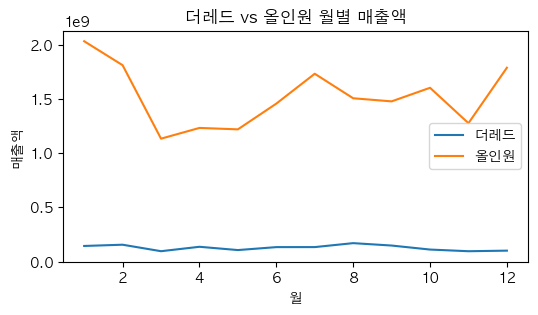

In [248]:
# 월별 매출 데이터 계산
monthly_sales_더레드 = df_format_더레드.groupby(df_format_더레드['거래일자'].dt.month)['거래금액'].sum()
monthly_sales_올인원 = df_format_올인원.groupby(df_format_올인원['거래일자'].dt.month)['거래금액'].sum()

# 막대 그래프 그리기
plt.figure(figsize=(6, 3))
plt.plot(monthly_sales_더레드.index, monthly_sales_더레드.values, label='더레드')
plt.plot(monthly_sales_올인원.index, monthly_sales_올인원.values, label='올인원')

plt.xlabel('월')
plt.ylabel('매출액')
plt.title('더레드 vs 올인원 월별 매출액')
plt.legend()

plt.show()

In [275]:
# '고객id'와 '거래일자'에 따라 정렬
df_rep_sorted = df_rep.sort_values(by=['고객id', '거래일자'])

# 이전 거래일자와의 차이 계산
df_rep_sorted['재구매기간'] = df_rep_sorted.groupby('고객id')['거래일자'].diff()

# 결과 확인
df_rep_sorted[['고객id', '거래일자', '재구매기간']].head(50)

,고객id,거래일자,재구매기간
39881,0,2022-04-18 13:04:07,NaT
50280,1,2022-05-31 16:05:32,NaT
63622,10,2022-07-09 20:07:34,NaT
69121,10,2022-07-24 17:07:50,14 days 21:00:16
78537,10,2022-08-21 19:08:05,28 days 02:00:15
81601,10,2022-08-30 07:08:05,8 days 12:00:00
24504,1000,2022-02-28 08:02:59,NaT
52483,1000,2022-06-07 18:06:59,99 days 10:04:00
106553,1000,2022-11-09 23:11:15,155 days 05:04:16
66976,10000,2022-07-19 13:07:46,NaT


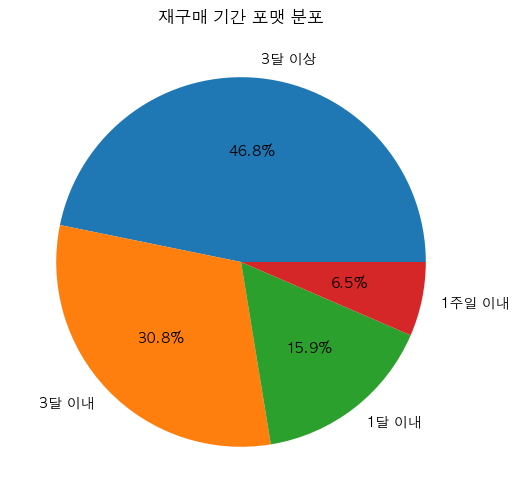

In [279]:
import numpy as np

# 재구매 기간을 일 단위로 변환
df_rep_sorted['재구매기간(일)'] = df_rep_sorted['재구매기간'].dt.days

# 포맷을 나타내는 컬럼 추가
df_rep_sorted['재구매포맷'] = pd.cut(df_rep_sorted['재구매기간(일)'], bins=[-np.inf, 7, 30, 90, np.inf], labels=['1주일 이내', '1달 이내', '3달 이내', '3달 이상'])

# 포맷별 재구매 기간 count 계산
format_counts = df_rep_sorted['재구매포맷'].value_counts()

# pie chart 그리기
plt.figure(figsize=(6, 6))
plt.pie(format_counts, labels=format_counts.index, autopct='%1.1f%%')
plt.title('재구매 기간 포맷 분포')
plt.show()

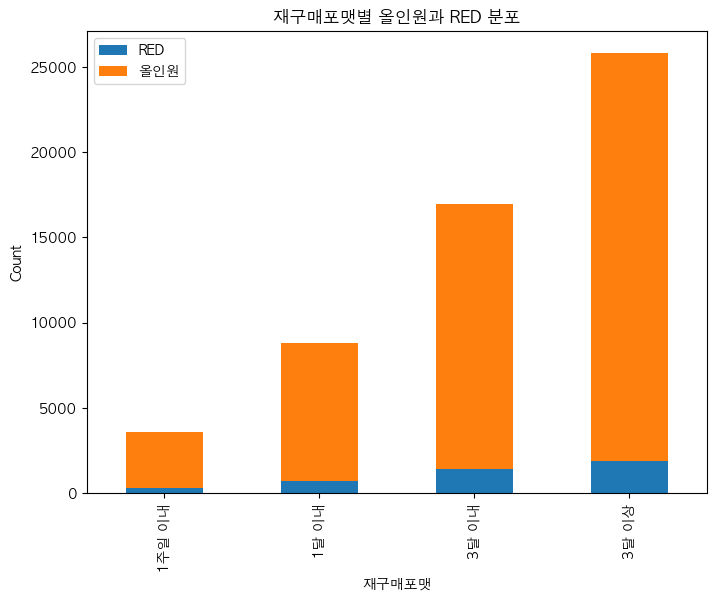

In [280]:
# 재구매포맷과 포맷으로 그룹화하여 카운트 계산
format_counts = df_rep_sorted.groupby(['재구매포맷', '포맷']).size().unstack()

# 막대그래프 그리기
format_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('재구매포맷별 올인원과 RED 분포')
plt.xlabel('재구매포맷')
plt.ylabel('Count')
plt.legend()
plt.show()
